In [16]:
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()


In [21]:
tf=pd.read_csv('aggregate_timeline_data.csv')

tf.Time=[x.replace('Jan ','1/1/').replace('Jul ','7/1/') for x in tf.Time.values]
tf.Time=pd.to_datetime(tf.Time)
tf=tf.set_index('Time')
tf=-tf

<AxesSubplot:xlabel='Time'>

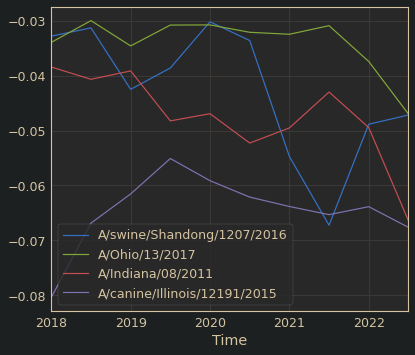

In [48]:
tf.ewm(alpha=.85).mean().plot()

In [57]:
df=pd.read_csv('./irat_predictions.csv',index_col=0).set_index('Influenza Virus')
df=df.loc[tf.columns,:]

df['IRATdate']=[x.replace('Jun ','6/1/').replace('Dec ','12/1/').replace('Jan ','1/1/').replace('Jul ','7/1/') for x in df['Dates of Risk Assessment']]
df=df[['IRATdate','Geometric Mean']]
df['Geometric Mean']=-df['Geometric Mean']

df=df.reset_index().set_index('IRATdate')#.transpose()
df=df.rename(columns={'index':'strain'})
df.index=pd.to_datetime(df.index)

In [60]:
df

,strain,Geometric Mean
IRATdate,,
2020-07-01,A/swine/Shandong/1207/2016,-0.043961
2019-07-01,A/Ohio/13/2017,-0.023757
2012-12-01,A/Indiana/08/2011,-0.021822
2016-06-01,A/canine/Illinois/12191/2015,-0.095664


In [58]:
tf#.ewm(alpha=.85).mean().plot()

,A/swine/Shandong/1207/2016,A/Ohio/13/2017,A/Indiana/08/2011,A/canine/Illinois/12191/2015
Time,,,,
2018-01-01,-0.032781,-0.033915,-0.038416,-0.080415
2018-07-01,-0.031051,-0.029356,-0.040984,-0.064843
2019-01-01,-0.044415,-0.035359,-0.038860,-0.060634
2019-07-01,-0.037899,-0.030091,-0.049837,-0.053959
2020-01-01,-0.028677,-0.030730,-0.046689,-0.059856
2020-07-01,-0.034183,-0.032315,-0.053221,-0.062654
2021-01-01,-0.058453,-0.032501,-0.049033,-0.064146
2021-07-01,-0.069476,-0.030599,-0.041815,-0.065595
2022-01-01,-0.045593,-0.038551,-0.050595,-0.063619


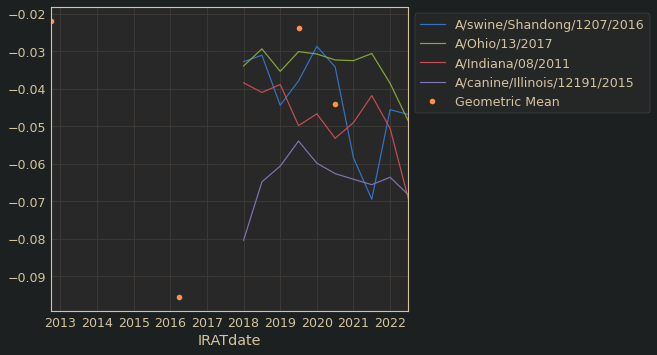

In [64]:
import pylab as plt
tf.plot()
df['Geometric Mean'].plot(style='o')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
